# Taller Regresión Lineal

## Funciones básicas

En primer lugar, importamos las librerías que necesitaremos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #Algoritmo de regresión lineal
from sklearn.model_selection import train_test_split #para partir el conjunto de datos en Entrenamiento y Testeo
import matplotlib.pyplot as plt #para gráficas


Cargamos un conjunto de datos. Entrenaremos modelos de regresión lineal para un conjunto de datos sobre peces. Se desearía predecir el peso de un pez, a partir de algunas de sus medidas. Longitud vertical, diagonal, etc. Nuestra variable a predecir será el peso *Weight*.
Detalles sobre el conjunto de datos [Aquí](https://www.kaggle.com/datasets/aungpyaeap/fish-market).

Si está trabajando en colab, oprima el ícono de folder en la izquierda y luego el ícono de *subir.* Cargue un archivo de valrores separados por comas (.csv). A continuación usamos la función de pandas *read_csv*. Ingresamos como parámetro la ruta de ubicación del archivo. Si ya se ha subido el archivo, se puede desplegar el menú sobre dicho archivo y usar *copiar ruta*.

In [ ]:
# Leer archivo. Ingresar la ruta del archivo
df=pd.read_csv("/content/Fish.csv")

# Mostrar las primeras 10 líneas del dataset
df.head(10)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


Procedemos a graficar puntos con coordenadas x=Length1, y=Weight para observar si aparentan tener un comportamiento cercano al lineal.

Para más detalles sobre diagramas de dispersión ver [AQUÍ](https://www.w3schools.com/python/matplotlib_scatter.asp).

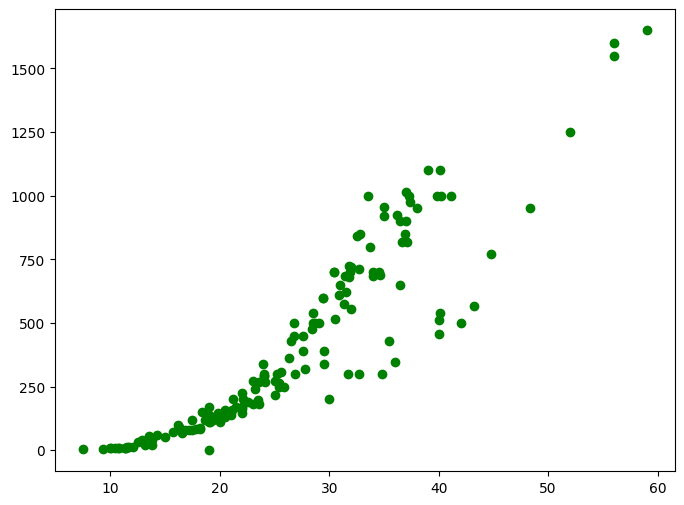

In [ ]:
#Graficar diagrama de dispersión para Length1 vs Weight
plt.figure(figsize = [8, 6]) #Establecemos el tamaño de la figura
plt.scatter(data=df, x='Length1', y='Weight', color= "green") #Asignamos la variable x, y y el color para el diagrama de dispersión.


Usaremos el algoritmo para regresión lineal de SciKit Learn. Éste recibe como datos de entrada (X) un arreglo de dos dimensones. Pero aquí tenemos un vector para cada atributo. Queremos entonces una matriz de tamaño (lo que corresponda) x 1. Ése es el significado que tiene el valor -1 en arreglos de Numpy. Siguiendo esta idea, redimensionaremos los datos de entrada X.

In [ ]:
X = np.array(df['Length1']).reshape(-1, 1)
y = df['Weight']

X

array([[23.2],
       [24. ],
       [23.9],
       [26.3],
       [26.5],
       [26.8],
       [26.8],
       [27.6],
       [27.6],
       [28.5],
       [28.4],
       [28.7],
       [29.1],
       [29.5],
       [29.4],
       [29.4],
       [30.4],
       [30.4],
       [30.9],
       [31. ],
       [31.3],
       [31.4],
       [31.5],
       [31.8],
       [31.9],
       [31.8],
       [32. ],
       [32.7],
       [32.8],
       [33.5],
       [35. ],
       [35. ],
       [36.2],
       [37.4],
       [38. ],
       [12.9],
       [16.5],
       [17.5],
       [18.2],
       [18.6],
       [19. ],
       [19.1],
       [19.4],
       [20.4],
       [20.5],
       [20.5],
       [21. ],
       [21.1],
       [22. ],
       [22. ],
       [22.1],
       [23.6],
       [24. ],
       [25. ],
       [29.5],
       [23.6],
       [24.1],
       [25.6],
       [28.5],
       [33.7],
       [37.3],
       [13.5],
       [14.3],
       [16.3],
       [17.5],
       [18.4],
       [19

Ahora usamos la función train_test_split para partir el conjunto de datos en dos subconjuntos: entrenamiento y testeo. Para ver ejemplos del uso de esta función ver [AQUÍ](https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/).

Usar sólo los parámetros X,y, test_size (Porcentaje de los datos correspondiente al conjunto de testeo). Se suelen usar proporciones al rededor de Entrenamiento 80% y Testeo 20%.

In [ ]:
# Partir el conjunto de datos en Entrenamiento y Testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Ahora definamos el modelo de regresión lineal. Nuestro modelo se llamará *regr*. Lo entrenaremos y mediremos su coeficiente de detrminación.

In [ ]:
# Modelo de regresión lineal de SciKit Learn

#Importar métricas
from sklearn.metrics import mean_squared_error, r2_score

#Se define el algoritmo a usar para entrenar el modelo
regr = LinearRegression()
#se entrena el modelo con el dataset y etiqueta de entrenamiento
regr.fit(X_train, y_train)
#se calculan predicciones para el conjunto de test.
y_pred = regr.predict(X_test)

print("score = ", r2_score(y_test, y_pred))  #Coeficiente de determinación
print("MSE = ",mean_squared_error(y_test, y_pred))


score =  0.8704358223159558
MSE =  24522.898307824915


La salida anterior es el coeficiente de determinación del modelo arrojado por el algoritmo, así como el error cuadrático medio.


A continuación imprimimos la pendiente y el intercepto de la recta arrojada por el modelo.

In [ ]:
print('slope:', regr.coef_[0])
print('intercept:', regr.intercept_)

slope: 31.458753582418638
intercept: -433.36064770790983


Ahora graficaremos el conjunto de testeo y la recta correspondiente al modelo en una misma gráfica.

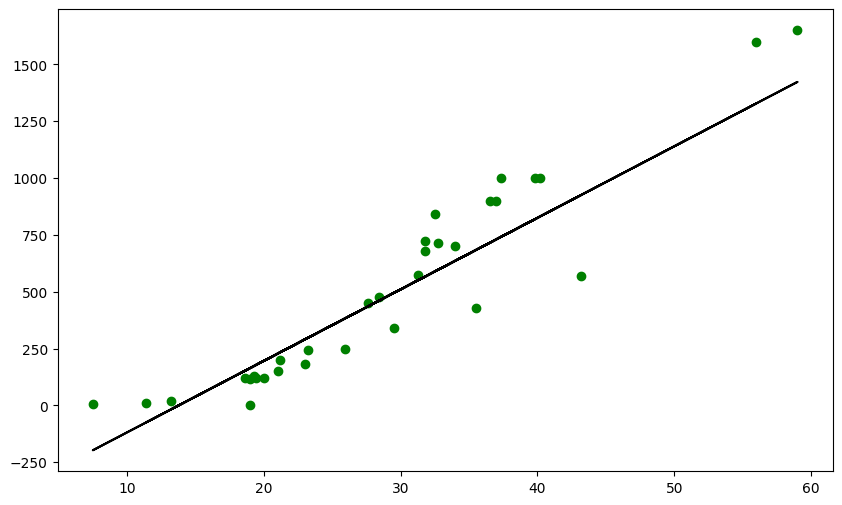

In [ ]:
y_pred = regr.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color ='g')
plt.plot(X_test, y_pred, color ='k')
plt.show()

## Su turno


1. Bosquejar en la misma gráfica el diagrama de dispersión de (Lenght1,Weight) en color verde y el diagrama de dispersión para (Width, Weight) en color azul. Para esto sólo se requiere añadir al código dos líneas seguidas del tipo: plt.scatter(data=df, x=___, y=___, color= ___)

2. ¿Cuál modelo tendrá una pendiente mayor?
3. Entrenar un modelo de regresión lineal para predecir el peso (Weight), usando la variable Width.
4. ¿Cuál tiene mayor Coeficiente de determinación? ¿por qué cree que esto ocurre?

# Respuestas

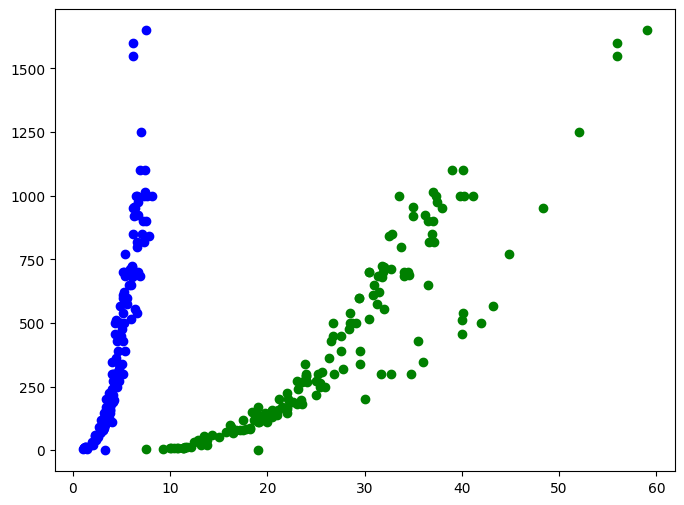

In [ ]:
#Punto 1
#Graficar diagrama de dispersión para Length1 vs Weight
plt.figure(figsize = [8, 6]) #Establecemos el tamaño de la figura
plt.scatter(data=df, x='Length1', y='Weight', color= "green") #Asignamos la variable x, y y el color para el diagrama de dispersión.
plt.scatter(data=df, x='Width', y='Weight', color= "blue")


## Las dos formas de hacer regresión lineal

In [ ]:
#Punto 2 y 3
#Entrenar un modelo de regresión lineal para predecir el peso (Weight), usando la variable Width.
X = np.array(df['Width']).reshape(-1, 1)
y = df['Weight']

# Partir el conjunto de datos en Entrenamiento y Testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Modelo de regresión lineal de SciKit Learn

#Importar métricas
from sklearn.metrics import mean_squared_error, r2_score

#Se define el algoritmo a usar para entrenar el modelo
regr = LinearRegression()
#se entrena el modelo con el dataset y etiqueta de entrenamiento
regr.fit(X_train, y_train)
#se calculan predicciones para el conjunto de test.
y_pred = regr.predict(X_test)

print("score = ", r2_score(y_test, y_pred))
print("MSE = ",mean_squared_error(y_test, y_pred))

print('slope:', regr.coef_[0])
print('intercept:', regr.intercept_)

score =  0.6504753604644007
MSE =  59755.30103179728
slope: 184.38038284465938
intercept: -425.21864422248166


2. Como podemos evidenciar, el valor de la variable slope en el diagrama de dispersión para (Width, Weight) en color azul es mayor respecto al primer diagrama ((Length1, Weight)).

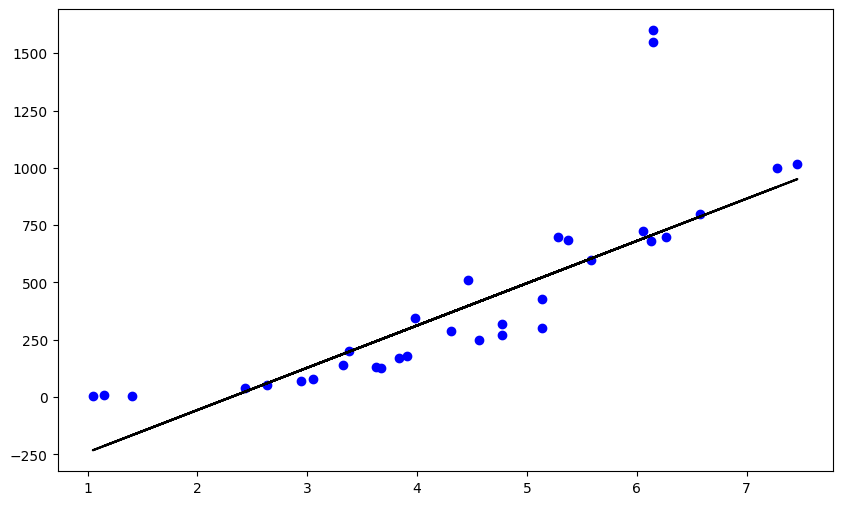

In [ ]:
y_pred = regr.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

4. ¿Cuál tiene mayor Coeficiente de determinación? ¿por qué cree que esto ocurre?

score1 =  0.896685552532399

score2 =  0.79005738157196

De acuerdo con esto, la variable length1 explica de mejor manera la variable weight. En este caso, width sería menos acertiva.

Por otro lado, visualmente o intuitivamente, al observar las gráficas, la correspondiente a (Width, Weight) en color azul, se evidencia una tendencia más poligonal o exponencial. El modelo verde, tiene mayor score porque tiende a ser más lineal.

**--------------------------------------------------------------------------------------------------------------------------------------------------**

En clase vimos que hay dos formas de lograr un modelo de regresión lineal. La primera es calculando el vector de parámetros que minimice la función de error, mediante derivadas. Vimos una fórmula para dicho mínimo. Éste es el método de usa el algoritmo *LinearRegression* de SKLearn.

Sin embargo, vimos también que hay otra forma de encontrar dicho mínimo y es mediante el algoritmo del decenso de gradiente. (¿Recuerda la ventaja o desventaja de cada uno?, si o las recuerda, será mejor investigarlas).

Vamos a considerar un conjunto de datos muy simple: las cuatro esquinas de un cuadrado.

In [ ]:
X = np.array([0, 0, 1, 1])
y = np.array([0, 1, 0, 1])

X = np.array(X).reshape(-1, 1)
´

Podemos aplicar el algoritmo *LinearRegression* para intentar modelar linealmente este conunto de datos.

**Ojo:** Tenga presentes dos cosas.
-  Recuerde que LinearRegression recibe como datos de entrada un arreglo 2-dimensional, por lo cual debe redimensionar sus datos.
- Al ser tan pocos datos, no separaremos en *train* y *test*. Símplemente entrenaremos el modelo usando *X*, *y* en lugar de *X_train*, *y_train*.


### Ejercicio

4. De acuerdo a lo visto en clase, cuál intuye que sería la recta que arrojaría este algoritmo como modelo de regresión lineal? ¿Por qué?
5. Use *LinearRegression* de SKLearn para calcular dicho modelo. Calcule su coeficiente de determinación.
6. ¿Observa algo particular en el coeficiente de determinación? Explique ka razón de dicho valor.

# Respuestas

4. Consideramos que la recta sería constante porque eso representa el error mínimo, el cual es el objetivo del modelo de Regresión Lineal.

In [ ]:
#Punto 5
# Modelo de regresión lineal de SciKit Learn

#Importar métricas
from sklearn.metrics import mean_squared_error, r2_score

#Se define el algoritmo a usar para entrenar el modelo
regr = LinearRegression()
#se entrena el modelo con el dataset y etiqueta de entrenamiento
regr.fit(X, y)
#se calculan predicciones para el conjunto de test.
y_pred = regr.predict(X)

print("score = ", r2_score(y, y_pred))

score =  0.0


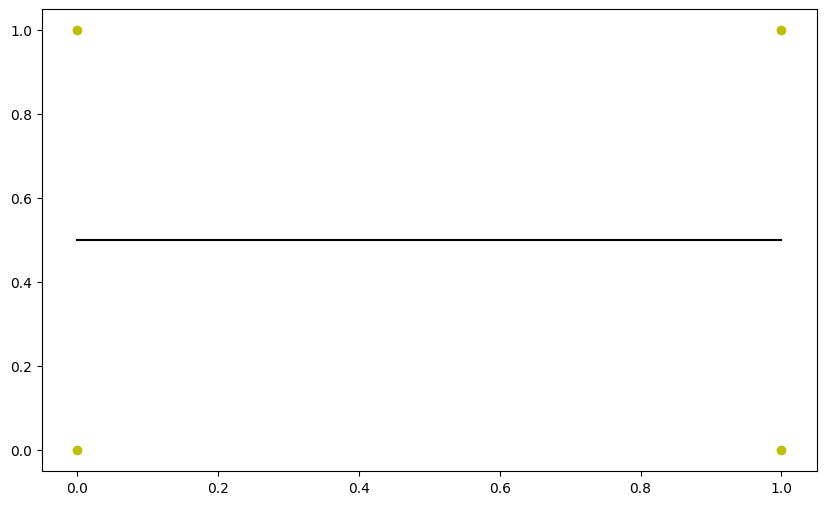

In [ ]:
y_pred = regr.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color ='y')
plt.plot(X, y_pred, color ='k')
plt.show()´

6. Observamos que el coeficiente de determinación es cero. Lo que significa que el modelo de Regresión de Lineal no tiene error.

### Ejercicio: Ahora con decenso de gradiente

Podemos entrenar un modelo de regresión lineal utilizando el decenso de gradiente. Existe un algoritmo en SKLearn que hace eso: *SGDRegressor*. Investigue un poco sobre este algoritmo y sus parámetros.

7. Entrene un algoritmo de regresión lineal usando SGDRegressor. En dicho entrenamiento, utilice en primer lugar los parámetros:
- learning_rate='constant'
- eta0=0.01, max_iter=10000
- tol=1e-3
- random_state=0

8. Compare el resultado con el de *LinearRegressor*. ¿Cuál dio mejor resultado? ¿Por qué?¿Convendría siempre utilizar el algoritmo que dió mejor resultado?

9. Experimente con diferentes valores de los parámetros de SGDRegressor. Qué concluye acerca del efecto de variar dichos parámetros?

10. Escriba algunas conclusiones generales del ejercicio.

In [ ]:
from sklearn.linear_model import SGDRegressor

#Se define el algoritmo a usar para entrenar el modelo
regr = SGDRegressor(learning_rate='constan´t', eta0=0.01, max_iter=10000, tol=1e-3, random_state=0)
#se entrena el modelo con el dataset y etiqueta de entrenamiento
regr.fit(X, y)
#se calculan predicciones para el conjunto de test.
y_pred = regr.predict(X)

print("score = ", r2_score(y, y_pred))
print("MSE = ",mean_squared_error(y, y_pred))

print('slope:', regr.coef_[0])
print('intercept:', regr.intercept_)

score =  -0.07099187031037335
MSE =  0.26774796757759334
slope: 0.13238507347862496
intercept: [0.31819382]


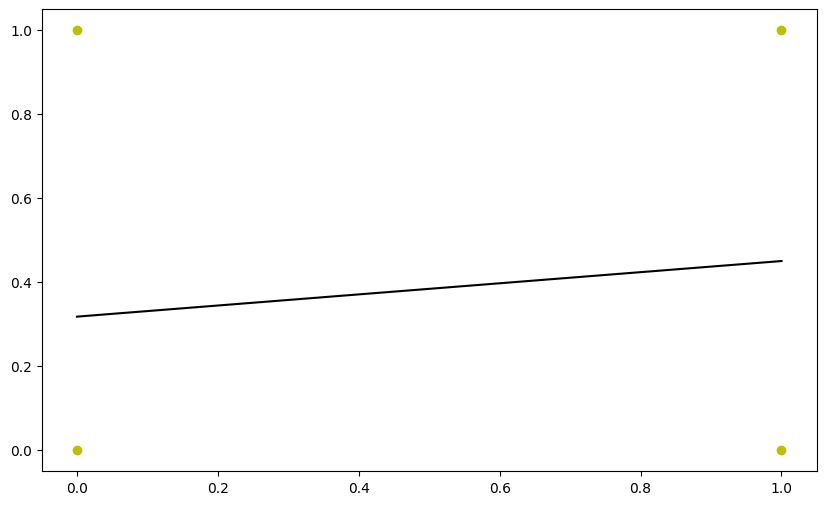

In [ ]:
y_pred = regr.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color ='y')
plt.plot(X, y_pred, color ='k')
plt.show()

# Punto 8


Da mejor resultado el de*LinearRegression*, pero tiene un costo computacional demasiado alto, por lo que, es poco efectivo al momento de trabajar con bases de datos muy grandes. De esta forma, no siempre es conveniente implementar *LinearRegression*, particularmente cuando se trabaja en el área de Aprendizaje Automático de Máquina.


# Punto 9

Experimente con diferentes valores de los parámetros de SGDRegressor. Qué concluye acerca del efecto de variar dichos parámetros?


score =  -0.02348092435007887
MSE =  0.2558702310875197
slope: 0.09565454498687752
intercept: [0.51202908]


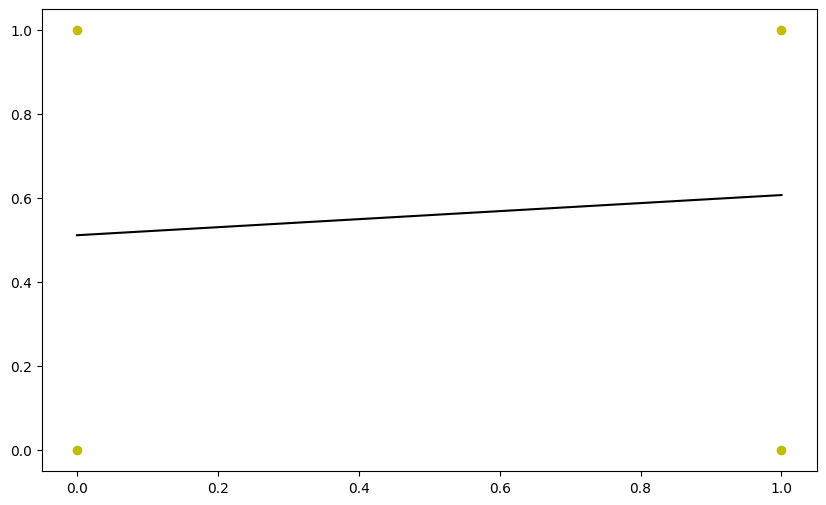

In [63]:
from sklearn.linear_model import SGDRegressor

#Se define el algoritmo a usar para entrenar el modelo
regr = SGDRegressor(learning_rate='constant', eta0=0.2, max_iter=2500000000, tol=1e-3, random_state=0)
#se entrena el modelo con el dataset y etiqueta de entrenamiento
regr.fit(X, y)
#se calculan predicciones para el conjunto de test.
y_pred = regr.predict(X)
Code
Text
￼￼Choose FilesNo file chosenψ
# Punto 10*   SGDRegressor es mejor para problemas de Machine Learning.*   SGDRegressor suele arrojar resultado óptimos pero no necesariamente el mejor. Para que sea perfecto, toca dar paso menores con más iteraciones pero requiere mucho más costo computacional.*   LinearRegression es bueno cuando tenemos una base de datos de tamaño razonable, pero no lo vale cuando es muy grande.
￼
Punto 10

print("score = ", r2_score(y, y_pred))
print("MSE = ",mean_squared_error(y, y_pred))

print('slope:', regr.coef_[0])
print('intercept:', regr.intercept_)


y_pred = regr.predict(X)´

plt.figure(figsize=(10,6))
plt.scatter(X, y, color ='y')
plt.plot(X, y_pred, color ='k')
plt.show()


Al experimentar variando los parámetros de SGDRegressor, pudimos observar que eta0 (magnitud del pasito) y max_iter (número de iteraciones), son los argumentos que más influeyen en el modelo. a medida que el pasito se vuelve más pequeño y, a su vez, hay más iteraciones, el modelo va a ser mucho más preciso y con menos error. Sin embargo, tampoco es conveniente tener un pasito muy muy pequeño porque puede tener un gran costo computacional.

---



# Punto 10

*   SGDRegressor es mejor para problemas de Machine Learning.

*   SGDRegressor suele arrojar resultado óptimos pero no necesariamente el mejor. Para que sea perfecto, toca dar paso menores con más iteraciones pero requiere mucho más costo computacional.

*   LinearRegression es bueno cuando tenemos una base de datos de tamaño razonable, pero no lo vale cuando es muy grande.

* Nuestro modelo va a ser mejor mientras su score se acerque más a 1.




